In [2]:
## What is the effect of increasing state temperatures on wildfire severity and frequency?

In [53]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime

In [2]:
# Import data
jan_avg_temp = pd.read_csv('Resources/1990-2020_Jan_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
feb_avg_temp = pd.read_csv('Resources/1990-2020_Feb_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
mar_avg_temp = pd.read_csv('Resources/1990-2020_Mar_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
apr_avg_temp = pd.read_csv('Resources/1990-2020_Apr_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
may_avg_temp = pd.read_csv('Resources/1990-2020_May_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jun_avg_temp = pd.read_csv('Resources/1990-2020_Jun_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jul_avg_temp = pd.read_csv('Resources/1990-2020_Jul_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
aug_avg_temp = pd.read_csv('Resources/1990-2020_Aug_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
sep_avg_temp = pd.read_csv('Resources/1990-2020_Sep_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
oct_avg_temp = pd.read_csv('Resources/1990-2020_Oct_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
nov_avg_temp = pd.read_csv('Resources/1990-2020_Nov_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
dec_avg_temp = pd.read_csv('Resources/1990-2020_Dec_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')


In [3]:
# jan_avg_temp.columns = ['Date', 'Average Temperature', 'NA']
# jan_avg_temp.drop('NA', 1).head()

In [3]:
# Remove anomaly column
# List of dataframes
months_dfs = [jan_avg_temp, feb_avg_temp, mar_avg_temp, apr_avg_temp, may_avg_temp, jun_avg_temp, jul_avg_temp, aug_avg_temp, sep_avg_temp, oct_avg_temp, nov_avg_temp, dec_avg_temp]

# Create a for loop to change last column to "NA" for all dfs and then drop column "NA" 
for df in months_dfs:
    df.columns = ['Date', 'Average Temperature', 'NA']
    df['Avg Temp (F)'] = df['Average Temperature']
    df.drop('Average Temperature', 1, inplace= True)
    del df['NA']

In [5]:
# # Split up date into year and month columns
# jan_avg_temp['fake_year'] = pd.to_datetime(jan_avg_temp['Date'],format='%Y%m')
# jan_avg_temp['year'] = pd.DatetimeIndex(jan_avg_temp['fake_year']).year
# jan_avg_temp['month'] = pd.DatetimeIndex(jan_avg_temp['fake_year']).month
# jan_avg_temp.drop('fake_year', 1).head()

In [4]:
jan_avg_temp.head()

,Date,Avg Temp (F)
0,199001,43.1
1,199101,43.6
2,199201,43.2
3,199301,41.3
4,199401,45.7


In [5]:
# Create a loop to get year and month from all dataframes 
months_dfs = [jan_avg_temp, feb_avg_temp, mar_avg_temp, apr_avg_temp, may_avg_temp, jun_avg_temp, jul_avg_temp, aug_avg_temp, sep_avg_temp, oct_avg_temp, nov_avg_temp, dec_avg_temp]

for df in months_dfs:
    df['fake_year'] = pd.to_datetime(df['Date'],format='%Y%m')
    df['Year'] = pd.DatetimeIndex(df['fake_year']).year
    df['Month'] = pd.DatetimeIndex(df['fake_year']).month
    df.drop('fake_year', 1, inplace= True)
    df.drop('Date', 1, inplace= True)

In [6]:
# Set year as index
for df in months_dfs:
    df.set_index('Year', 1, inplace = True)

In [7]:
# Merge data from Jan-Dec on Month (or year), how = left
t1 = pd.merge(jan_avg_temp, feb_avg_temp, on= 'Year', how= 'left', suffixes=('_Jan', '_Feb'))
t2 = pd.merge(t1, mar_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t3 = pd.merge(t2, apr_avg_temp,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
t4 = pd.merge(t3, may_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t5 = pd.merge(t4, jun_avg_temp,  on= 'Year', how= 'left', suffixes=('_May', '_Jun'))
t5.drop(['Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_Jun'], 1, inplace = True)
t6 = pd.merge(t5, jul_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t7 = pd.merge(t6, aug_avg_temp,  on= 'Year', how= 'left', suffixes=('_Jul', '_Aug'))
t8 = pd.merge(t7, sep_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
t9 = pd.merge(t8, oct_avg_temp,  on= 'Year', how= 'left', suffixes=('_Sep', '_Oct'))
t10 = pd.merge(t9, nov_avg_temp,  on= 'Year', how= 'left', suffixes=("",""))
merged_df = pd.merge(t10, dec_avg_temp,  on= 'Year', how= 'left', suffixes=('_Nov', '_Dec')) 
merged_df.drop(['Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec'], 1, inplace = True)

In [8]:
merged_df['yearly mean'] = merged_df.mean(axis=1)
merged_df.head()

,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,yearly mean
Year,,,,,,,,,,,,,
1990,43.1,42.7,51.4,58.4,60.2,69.4,76.4,73.7,69.9,62.0,50.0,38.4,57.966667
1991,43.6,51.5,44.8,52.7,57.9,66.2,75.4,73.2,72.2,64.5,51.6,44.0,58.133333
1992,43.2,49.1,50.8,58.9,67.0,69.0,73.8,76.2,70.8,62.6,49.5,40.3,59.266667
1993,41.3,44.0,52.9,55.2,62.3,68.0,72.2,73.2,69.5,61.4,48.8,43.1,57.658333
1994,45.7,43.7,52.9,55.9,61.3,70.9,76.5,75.8,69.8,58.6,42.9,42.1,58.008333


In [45]:
# Reset index
new_df = merged_df.reset_index()
new_df.head()

,Year,Avg Temp (F)_Jan,Avg Temp (F)_Feb,Avg Temp (F)_Mar,Avg Temp (F)_Apr,Avg Temp (F)_May,Avg Temp (F)_Jun,Avg Temp (F)_Jul,Avg Temp (F)_Aug,Avg Temp (F)_Sep,Avg Temp (F)_Oct,Avg Temp (F)_Nov,Avg Temp (F)_Dec,yearly mean
0,1990,43.1,42.7,51.4,58.4,60.2,69.4,76.4,73.7,69.9,62.0,50.0,38.4,57.966667
1,1991,43.6,51.5,44.8,52.7,57.9,66.2,75.4,73.2,72.2,64.5,51.6,44.0,58.133333
2,1992,43.2,49.1,50.8,58.9,67.0,69.0,73.8,76.2,70.8,62.6,49.5,40.3,59.266667
3,1993,41.3,44.0,52.9,55.2,62.3,68.0,72.2,73.2,69.5,61.4,48.8,43.1,57.658333
4,1994,45.7,43.7,52.9,55.9,61.3,70.9,76.5,75.8,69.8,58.6,42.9,42.1,58.008333


In [63]:
# Check cols
for cols in new_df.columns:
    print(cols)

Year
Avg Temp (F)_Jan
Avg Temp (F)_Feb
Avg Temp (F)_Mar
Avg Temp (F)_Apr
Avg Temp (F)_May
Avg Temp (F)_Jun
Avg Temp (F)_Jul
Avg Temp (F)_Aug
Avg Temp (F)_Sep
Avg Temp (F)_Oct
Avg Temp (F)_Nov
Avg Temp (F)_Dec
yearly mean


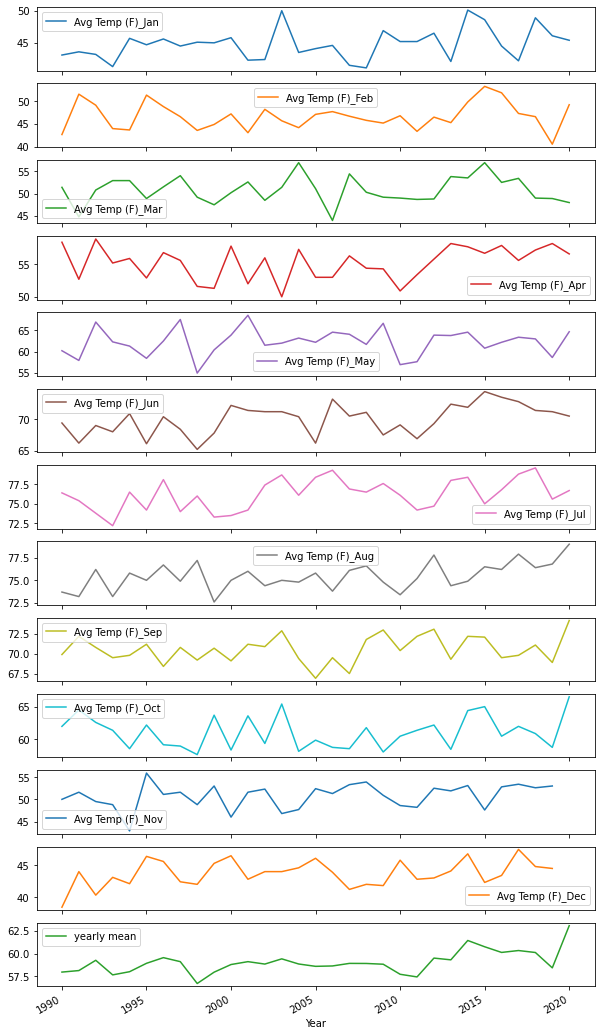

In [35]:
merged_df.plot.line(subplots= True, figsize = (10,20))
plt.show('yearly mean')

The correlation between year and the Yearly Average Temperature is 0.57


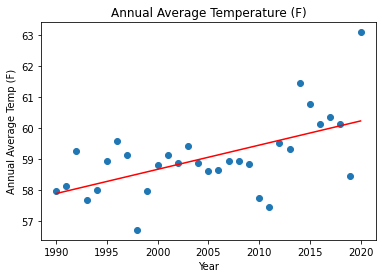

In [62]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(new_df['Year'],new_df['yearly mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(new_df['Year'],new_df['yearly mean'])

# # Calculate regression equation 
y = slope * new_df['Year'] + intercept

# # Plot the scatter
plt.scatter(new_df['Year'],new_df['yearly mean'])
plt.xlabel("Year")
plt.ylabel("Annual Average Temp (F)") 
plt.title("Annual Average Temperature (F)")

# # Add regression line
plt.plot(new_df['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')